# Empirical method to estimate ke and ki from experimental stationary distributions

In [1]:
#from sys import platform
import os
# rSNAPsim Image Processing
cwd = os.getcwd() # current working directory
os.chdir('..') # move one directory up
os.chdir('..') # move one directory up
import rSNAPsim_IP as rss_IP #importing rSNAPsim.
os.chdir(cwd) # return to the working directory

         _____ _   _____    ____       _              ________ 
   _____/ ___// | / /   |  / __ \_____(_)___ ___     /  _/ __ \
  / ___/\__ \/  |/ / /| | / /_/ / ___/ / __ `__ \    / // /_/ /
 / /   ___/ / /|  / ___ |/ ____(__  ) / / / / / /  _/ // ____/ 
/_/   /____/_/ |_/_/  |_/_/   /____/_/_/ /_/ /_/  /___/_/      
                                                               



## Simulation Workflow

<img src="images/Method_1.png" alt="Drawing" style="width: 1000px;"/>

## Is it possible to go in the <span style= "color:red"> inverse </span>  direction?

<img src="images/Method_2.png" alt="Drawing" style="width: 1000px;"/>

## Testing if each combination of {ki,ke,L} <span style= "color:red"> maps </span> to a specific distribution  {$\mu$,$\sigma$}.

<img src="images/Method_3.png" alt="Drawing" style="width: 1000px;"/>

## The goal is to find <span style= "color:red"> phenomenological equations </span> $f_{ke}(\mu,\sigma,L)$ and $f_{ki}(\mu,\sigma,L)$

In [2]:
# Importing libraries

from skimage import io ; from skimage.io import imread; from skimage.measure import find_contours
# Plotting
import matplotlib as mpl ; import matplotlib.pyplot as plt 
# To manipulate arrays
import numpy as np 
# To create interactive elements
#import ipywidgets as widgets ; from ipywidgets import interact, interactive, fixed, interact_manual, Button, HBox, VBox, Layout, GridspecLayout ; from IPython.display import Image
# Figure style and size
mpl.rc('figure',  figsize=(7, 7)); mpl.rc('image', cmap='gray'); mpl.rc('axes', grid=False)
# change the following to %matplotlib notebook for interactive plotting
import tifffile
import os; from os import listdir; from os.path import isfile, join
import random
# Parallel computing
from joblib import Parallel, delayed
import multiprocessing
from tqdm import tqdm
# Optimization
import scipy as sp
from scipy.optimize import curve_fit
# 3D plotting
from mpl_toolkits import mplot3d


In [3]:
# Deffining directory
save_to_path = '/home/luisub/Desktop/image_processing_toolbox/Output/testing_distributions'
rSNAPsim_directory = '/home/luisub/Documents/rSNAPsim-dev' 
if not os.path.exists(save_to_path):
    os.makedirs(save_to_path)

In [4]:
##################################
##################################
## Stochastic Simulations
number_spots = 100
n_frames = 200 # in seconds
step_size = 1 # in seconds
starting_time = 1000
##################################
##################################

In [5]:
#### Section that runs the stochastic simulations
sequences_directory = rSNAPsim_directory+'/gene_files/Bactin_withTags.txt'
## RUNNING THE SSA
# current working directory
cwd = os.getcwd()
#importing rSNAPsim.
os.chdir(rSNAPsim_directory)    
import rSNAPsim
# rename rSNAPsim as rss
rss = rSNAPsim.rSNAPsim()
# returning to the directory with the image processing codes.
os.chdir(cwd)    
rss.open_seq_file(sequences_directory)
# now to look for open reading frames
rss.get_orfs(rss.sequence_str)
rss.orfs# reading the 3 ORF.
# Deffining a Protein passing the DNA sequence 
protein1 = rss.sequence_str  
rss.nt2aa(protein1) # Converting nucleotides to Protein
rss.get_temporal_proteins()  #proteins sorted by
# Analyze the first protein, analyze function takes the aa_seq then nt_seq
rss.analyze_poi(rss.pois[0],rss.pois_seq[0]) 
rss.POI

In [80]:
rss.POI.total_length

712

In [82]:
rss.POI.tag_epitopes

{'T_Flag': [2, 11, 20, 196, 206, 218, 228, 300, 309, 318]}

# SSA for $\beta$-actin witn different ke and ki

## Simulaitng multiple ke and (ki=0.03)

In [6]:
number_of_evaluations_short = 5

In [7]:
list_simulations_ke = []
ki = 0.03
list_ke_short = np.linspace(1,number_of_evaluations_short,number_of_evaluations_short)
for i in range (0,len(list_ke_short)):
    ssa = rss.ssa_solver(n_traj = number_spots, start_time=starting_time,tf=starting_time+n_frames, tstep=starting_time+n_frames,k_elong_mean=list_ke_short[i], k_initiation=ki)  # tstep = total number of steps including the burnin time 
    simulated_trajectories_ke = ssa.intensity_vec
    list_simulations_ke.append (simulated_trajectories_ke)

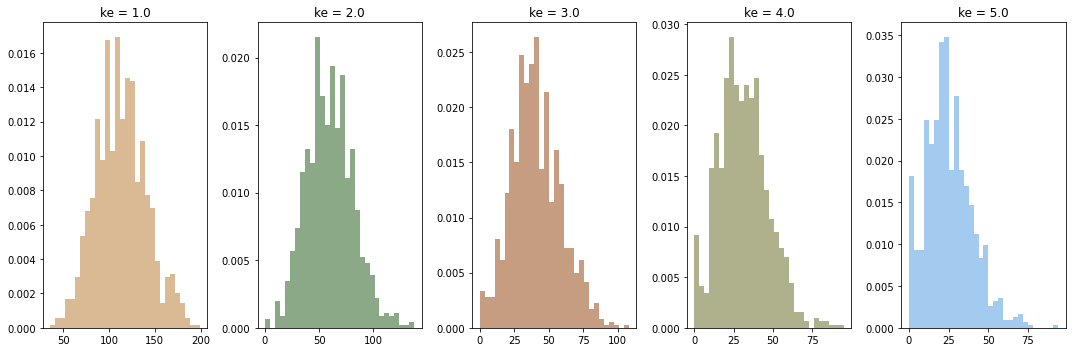

In [8]:
# Plotting
fig, axes = plt.subplots(nrows=1, ncols=len(list_ke_short), figsize=(15, 5))
for i, ke_val in enumerate (list_ke_short):
    axes[i].hist(list_simulations_ke[i][:,-1], alpha=0.5,bins=30,density=True, stacked=True, color=(random.random(),random.random(),random.random()) )      
    axes[i].set(title= 'ke = ' + str(round(ke_val,1)))
plt.tight_layout()

## Simulaitng multiple ki and (ke = 3)

In [9]:
list_simulations_ki = []
ke = 3
list_ki_short = np.linspace(0.02,0.08,number_of_evaluations_short)
for i in range (0,len(list_ki_short)):
    ssa = rss.ssa_solver(n_traj = number_spots, start_time=starting_time,tf=starting_time+n_frames, tstep=starting_time+n_frames,k_elong_mean=ke, k_initiation=list_ki_short[i])  # tstep = total number of steps including the burnin time 
    simulated_trajectories_ki = ssa.intensity_vec
    list_simulations_ki.append (simulated_trajectories_ki)

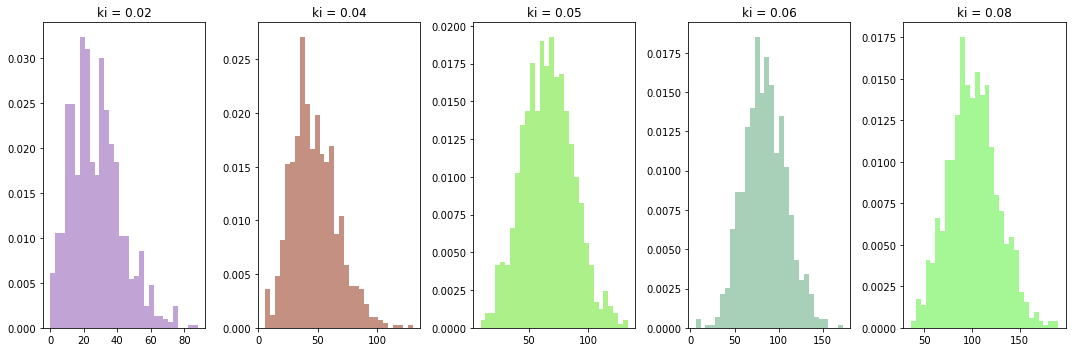

In [10]:
# Plotting
fig, axes = plt.subplots(nrows=1, ncols=len(list_simulations_ki), figsize=(15, 5))
for i, ki_val in enumerate (list_ki_short):
    axes[i].hist(list_simulations_ki[i][:,-1], alpha=0.5,bins=30,density=True, stacked=True, color=(random.random(),random.random(),random.random()) )      
    axes[i].set(title= 'ki = ' + str(round(ki_val,2)))
plt.tight_layout()

# Changing ke and ki simultaneously

In [11]:
number_of_evaluations = 10

In [12]:
list_ke = np.linspace(1,10,number_of_evaluations)     # np.linspace(min, max, n)
list_ki = np.linspace(0.02,0.08,number_of_evaluations)

In [13]:
def run_index (ki,ke):
    return ke,ki#, std_ssa
matrix_index = [[run_index(list_ki[j],list_ke[i]) for i in range(number_of_evaluations)] for j in range(number_of_evaluations)] 
ind_array = np.asarray(matrix_index)
#print('ke values: ')
#print(ind_array[:,:,0])
#print('ki values: ')
#print(np.round(ind_array[:,:,1],2))

In [64]:
list_simulations_ke[0].shape

(1000, 200)

In [14]:
def run_ssa (ki,ke):
    try:
        ssa = rss.ssa_solver(n_traj = number_spots, start_time=starting_time,tf=starting_time+n_frames, tstep=starting_time+n_frames,k_elong_mean=ke, k_initiation=ki)  # tstep = total number of steps including the burnin time 
        simulated_trajectories = ssa.intensity_vec
        mean_ssa = np.mean(simulated_trajectories[:,-1])
        std_ssa = np.std(simulated_trajectories[:,-1])
    except:
        mean_ssa = 0
        std_ssa = 0
    return round(mean_ssa,2), round(std_ssa,2)

## Loop that iterates for multiple ki and ke

In [ ]:
ssa_matrix = [[run_ssa(list_ki[j],list_ke[i]) for i in range(number_of_evaluations)] for j in range(number_of_evaluations)]
ssa_values=np.array(ssa_matrix) # converting the list into numpy array

In [16]:
means =np.round(ssa_values[:,:,0],0) # mean values
stds =np.round(ssa_values[:,:,1],0) # standard deviations

In [66]:
means

array([[ 79.,  42.,  28.,  20.,  17.,  14.,  12.,  10.,   9.,   8.],
       [100.,  53.,  37.,  28.,  23.,  18.,  16.,  14.,  13.,  11.],
       [122.,  66.,  46.,  35.,  28.,  23.,  20.,  17.,  16.,  14.],
       [144.,  78.,  54.,  41.,  34.,  28.,  23.,  22.,  19.,  16.],
       [164.,  91.,  62.,  48.,  38.,  32.,  28.,  24.,  22.,  20.],
       [185., 101.,  70.,  53.,  43.,  36.,  31.,  28.,  25.,  22.],
       [202., 112.,  79.,  60.,  49.,  41.,  36.,  31.,  28.,  25.],
       [218., 124.,  86.,  66.,  54.,  45.,  39.,  34.,  31.,  27.],
       [233., 135.,  93.,  72.,  58.,  49.,  42.,  38.,  34.,  31.],
       [244., 144., 101.,  78.,  64.,  53.,  47.,  41.,  38.,  33.]])

In [65]:
stds

array([[23., 18., 15., 13., 12., 11., 10., 10.,  9.,  9.],
       [26., 20., 17., 15., 13., 12., 11., 11., 11., 10.],
       [28., 21., 19., 16., 15., 14., 13., 12., 11., 10.],
       [28., 23., 21., 18., 17., 15., 14., 14., 12., 12.],
       [29., 24., 21., 19., 17., 16., 15., 14., 14., 13.],
       [31., 26., 21., 21., 18., 17., 16., 15., 14., 14.],
       [28., 27., 24., 21., 19., 18., 17., 17., 15., 14.],
       [29., 27., 24., 21., 19., 19., 18., 16., 16., 15.],
       [26., 29., 25., 22., 21., 19., 18., 17., 16., 16.],
       [22., 29., 26., 24., 22., 20., 20., 19., 17., 17.]])

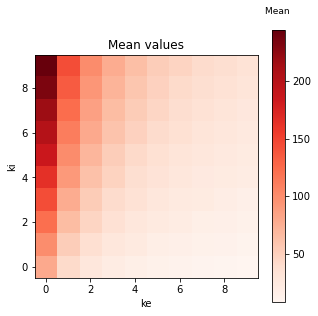

In [17]:
# Plotting means
fig, ax = plt.subplots( figsize=(5, 5))
pos = ax.imshow(means,origin='lower', cmap='Reds', interpolation='none')
ax.set(title= 'Mean values')
ax.set_xlabel('ke')
ax.set_ylabel('ki')
cbar = fig.colorbar(pos, ax=ax)
cbar.ax.set_title('Mean \n', fontsize=9)
plt.show()

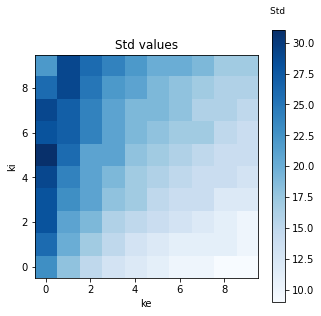

In [18]:
# Plotting stdvs
fig, ax = plt.subplots( figsize=(5, 5))
pos = ax.imshow(stds,origin='lower', cmap='Blues', interpolation='none')
ax.set(title= 'Std values')
ax.set_xlabel('ke')
ax.set_ylabel('ki')
cbar = fig.colorbar(pos, ax=ax)
cbar.ax.set_title('Std \n', fontsize=9)
plt.show()

## It appears that each combination of {ki,ke,L} <span style= "color:red"> maps </span> to a specific distribution {$\mu$,$\sigma$}.

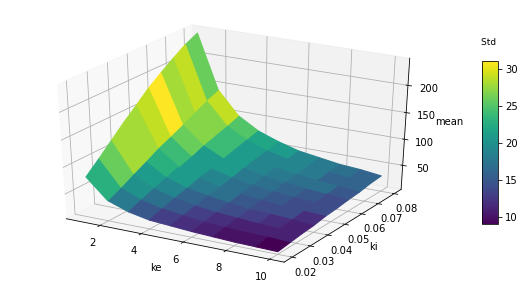

In [47]:
X, Y = np.meshgrid(list_ke, list_ki )
fig = plt.figure(figsize=(10, 5))
ax = plt.axes(projection='3d')
# fourth dimention - colormap
color_dimension = stds # change to desired fourth dimension
minn, maxx = color_dimension.min(), color_dimension.max()
norm = mpl.colors.Normalize(minn, maxx)
m = plt.cm.ScalarMappable(norm=norm, cmap='viridis')
m.set_array([])
fcolors = m.to_rgba(color_dimension)
surf =ax.plot_surface(X, Y, means, rstride=1, cstride=1, facecolors=fcolors, vmin=minn, vmax=maxx, shade=False)
#ax.view_init(60, 35)
ax.set_xlabel('ke')
ax.set_ylabel('ki')
ax.set_zlabel('mean')
cbar = fig.colorbar(m, shrink=0.6, aspect=10)
cbar.ax.set_title('Std \n', fontsize=9)
plt.show()


# Testing if the distributions follow a pattern

In [19]:
def exp_decay(x, a, b, c):
     return a*np.exp(-b*x) + c

## <span style= "color:red"> Mean values </span>

\begin{equation*}
\mu(ke)   = A \cdot e^{-B*ke} + C 
\end{equation*}

### Mean values (fixed ki = 0.02)

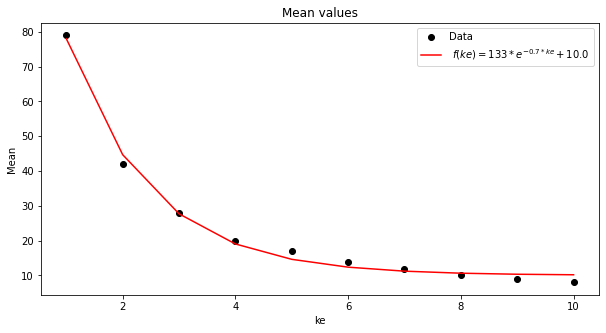

In [55]:
# Optimization for the means
popt_mu, pcov_mu = curve_fit(exp_decay, list_ke, means[0,:]) # optimization
fit_mu = exp_decay(list_ke, popt_mu[0],popt_mu[1],popt_mu[2]) # generating line with optimized values

# Plotting the means
fig, ax = plt.subplots( figsize=(10, 5))
ax.plot(list_ke,means[0,:], 'ok',linewidth = 3,label='Data') # mean
ax.plot(list_ke,fit_mu, '-r', markersize=10,label=' $f(ke) = %.0f * e^{-%.1f*ke} + %.1f$' % (popt_mu[0],popt_mu[1],popt_mu[2])) # mean
ax.set(title= 'Mean values')
ax.set_xlabel('ke')
ax.set_ylabel('Mean')
ax.legend()
plt.show()

#### Showing for all parameters

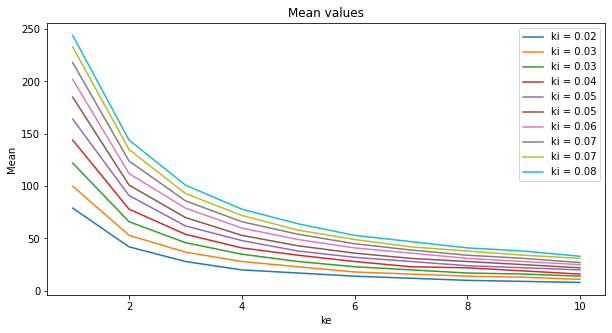

In [22]:
# Plotting the means
fig, ax = plt.subplots( figsize=(10, 5))
for i in range(number_of_evaluations):
    ax.plot( list_ke, means[i,:] ,label='ki = ' + str(round(list_ki[i],2) )) # mean
ax.set(title= 'Mean values')
ax.set_xlabel('ke')
ax.set_ylabel('Mean')
ax.legend()
plt.show()

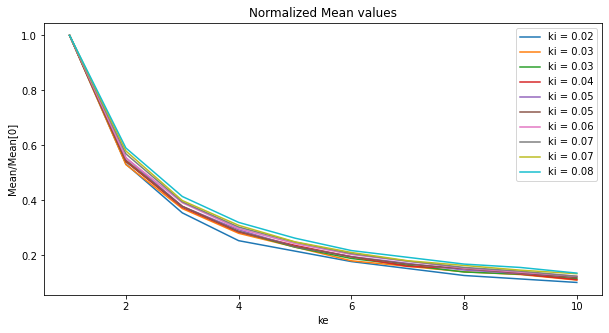

In [34]:
# Plotting the means
fig, ax = plt.subplots( figsize=(10, 5))
for i in range(number_of_evaluations):
    ax.plot( list_ke, means[i,:]/means[i,0],label='ki = ' + str(round(list_ki[i],2) )) # mean
ax.set(title= 'Normalized Mean values')
ax.set_xlabel('ke')
ax.set_ylabel('Mean/Mean[0]')
ax.legend()
plt.show()

#### Linear function for the inital mean value

\begin{equation*}
A = \mu[0]   = m\cdot ki + b
\end{equation*}

In [45]:
def linear(x, m, b):
     return m*x + b

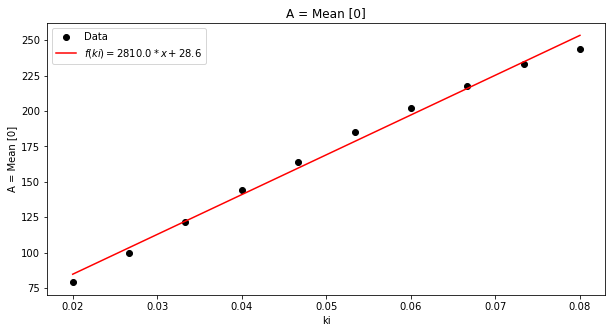

In [51]:
popt_init_mean, pcov_init_mean = curve_fit(linear, list_ki, means[:,0])
fit_init_mean= linear(list_ki, popt_init_mean[0],popt_init_mean[1])

# Plotting the means
fig, ax = plt.subplots( figsize=(10, 5))
ax.plot(list_ki, means[:,0], 'ok',linewidth = 3,label='Data') # mean
ax.plot(list_ki,fit_init_mean, '-r', markersize=10,label='$f(ki) = %.1f*x + %.1f$' % (popt_init_mean[0],popt_init_mean[1])) # mean
ax.set(title= 'A = Mean [0]')
ax.set_xlabel('ki')
ax.set_ylabel('A = Mean [0]')
ax.legend()
plt.show()

## A phenomenological function for $f_{\mu}(ke,ki)$

\begin{equation*}
\mu(ke,ki)   = ki (c_{1} \cdot e^{-B*ke} + c_{2})
\end{equation*}

# <span style= "color:red"> Standard Deviation </span>

### Standard deviation values (fixed ki = 0.02)

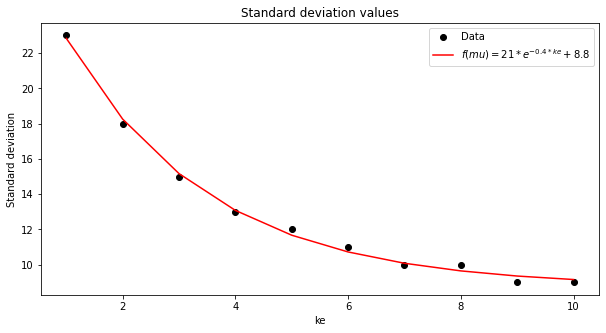

In [53]:
# Optimization for the standar deviation
popt_sd, pcov_mu = curve_fit(exp_decay, list_ke, stds[0,:]) # optimization
fit_sd = exp_decay(list_ke, popt_sd[0],popt_sd[1],popt_sd[2]) # generating line with optimized values

# Plotting the means
fig, ax = plt.subplots( figsize=(10, 5))
ax.plot(list_ke,stds[0,:], 'ok',linewidth = 3,label='Data') # mean
ax.plot(list_ke,fit_sd, '-r', markersize=10,label='$f(mu) = %.0f * e^{-%.1f*ke} + %.1f$' % (popt_sd[0],popt_sd[1],popt_sd[2])) # mean
ax.set(title= 'Standard deviation values')
ax.set_xlabel('ke')
ax.set_ylabel('Standard deviation')
ax.legend()
plt.show()


#### Showing for all parameters

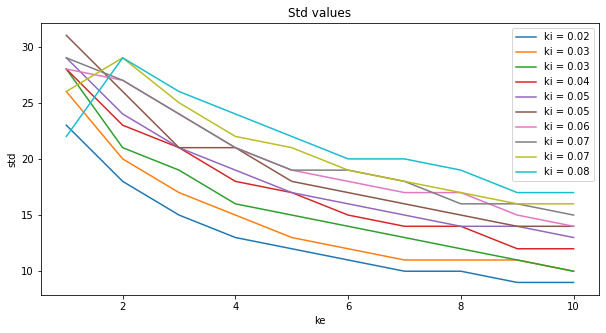

In [23]:
# Plotting the standar deviation
fig, ax = plt.subplots( figsize=(10, 5))
for i in range(number_of_evaluations):
    ax.plot( list_ke, stds[i,:]  ,label='ki = ' + str(round(list_ki[i],2) )) # mean
ax.set(title= 'Std values')
ax.set_xlabel('ke')
ax.set_ylabel('std')
ax.legend()
plt.show()

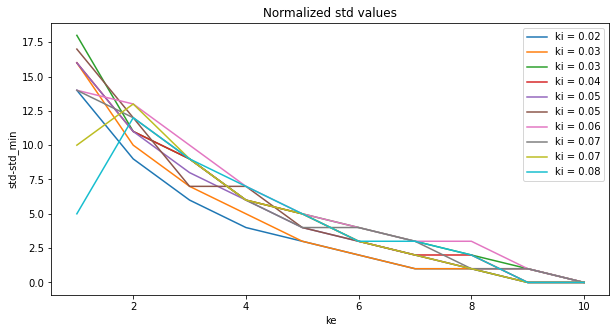

In [39]:
# Plotting the means
fig, ax = plt.subplots( figsize=(10, 5))
for i in range(number_of_evaluations):
    ax.plot( list_ke, stds[i,:]-np.amin(stds[i,:]),label='ki = ' + str(round(list_ki[i],2) )) # mean
ax.set(title= 'Normalized std values')
ax.set_xlabel('ke')
ax.set_ylabel('std-std_min')
ax.legend()
plt.show()

## A phenomenological function for $f_{\sigma}(ke,ki)$

\begin{equation*}
\sigma(ke,ki)   = ki (\hat{c_{1}} \cdot e^{-\hat{B}*ke} + \hat{c_{2}})
\end{equation*}

## The goal is to find <span style= "color:red"> phenomenological equations </span> $f_{ke}(\mu,\sigma,L)$ and $f_{ki}(\mu,\sigma,L)$

## Standard deviation as a function of mean

In [25]:
def hill(x, vmax, km,n):
     return vmax*(x**n/(km+x**n))

### Hill function

\begin{equation*}
y   = vmax \frac{x^{n}} {km + x^{n}}
\end{equation*}

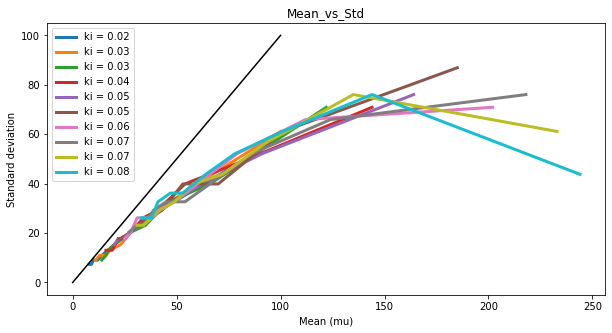

In [90]:
p0 = np.array([30,60,1])
popt_combined, pcov_combined = curve_fit(hill, fit_mu, fit_sd,p0)
fit_combined= hill(fit_mu, popt_combined[0],popt_combined[1],popt_combined[2])

# Plotting the means
fig, ax = plt.subplots( figsize=(10, 5))
for i in range(0,number_of_evaluations):
    ax.plot(means[i,:], ((stds[i,:]**2)/10)/factor, '-',linewidth = 3,label='ki = ' + str(round(list_ki[i],2) )) 

plt.plot([0,100],[0,100],'-k')    
#ax.plot(fit_mu,fit_combined, '-r', markersize=10,label='$f(mu) = %.0f * (mu^{%.2f} / %.0f + mu^{%.2f} )$' % (popt_combined[0],popt_combined[2],popt_combined[1],popt_combined[2])) # mean
ax.set(title= 'Mean_vs_Std')
ax.set_xlabel('Mean (mu)')
ax.set_ylabel('Standard deviation')
ax.legend()
plt.show()

In [59]:
stds[0,:]

array([23., 18., 15., 13., 12., 11., 10., 10.,  9.,  9.])

In [60]:
means[0,:]

array([79., 42., 28., 20., 17., 14., 12., 10.,  9.,  8.])

In [63]:
np.sqrt(stds[0,:])

array([4.79583152, 4.24264069, 3.87298335, 3.60555128, 3.46410162,
       3.31662479, 3.16227766, 3.16227766, 3.        , 3.        ])

Obtaning ke from experimental $\mu$
\begin{equation*}
ke(\mu)   = \frac{ln(A) -ln(\mu - C)} {B}
\end{equation*}

In [88]:
factor  = (1-(318/(2*712))) / (1-((2*318/(3*712))) ) 

In [89]:
factor

1.1059999999999999